# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction. A brief description of the attributes is given here below: 
    
<br> Preg: Number of times pregnant
<br> Plas: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
<br> Pres: Diastolic blood pressure (mm Hg)
<br> skin: Triceps skin fold thickness (mm)
<br> test: 2-Hour serum insulin (mu U/ml)
<br> mass: Body mass index (weight in kg/(height in m)^2)
<br> pedi: Diabetes pedigree function
<br> age: Age (years)
<br> class: Class variable (0 or 1)

</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [120]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import model_selection
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.stats import pearsonr
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score


# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [121]:
ls

R3-Internal Lab-PimaD.ipynb    pima-indians-diabetes+(3).csv


In [122]:
pima_df = pd.read_csv('pima-indians-diabetes+(3).csv')

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file.

# Q2. Print 10 samples from the dataset

In [123]:
pima_df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [124]:
pima_df.info() #datatypes of each col

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [125]:
pima_df.shape

(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [126]:
cols_modify = pima_df.columns
cols_modify = cols_modify.drop('class') #we don't need to modify class column
cols_modify = cols_modify.drop('Preg')
cols_modify

Index(['Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')

In [127]:
pima_df['test'].median()

30.5

In [128]:
pima_df['Preg'].median()

3.0

In [129]:
#for col in cols_modify:
pima_df[cols_modify] = pima_df[cols_modify].replace(0,pima_df[cols_modify].median())

In [130]:
pima_df.head(10) #check if the changes took effect

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [131]:
pima_df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [132]:
c_0 = pima_df[pima_df['class']==0]['class'].count()
c_1 = pima_df[pima_df['class']==1]['class'].count()
print(c_0)
print(c_1)

500
268


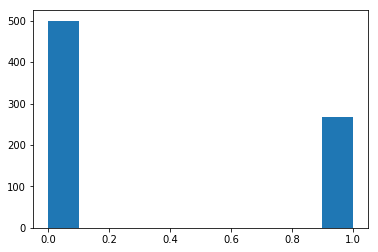

In [133]:
plt.hist(pima_df['class'],bins=10)
plt.show()

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


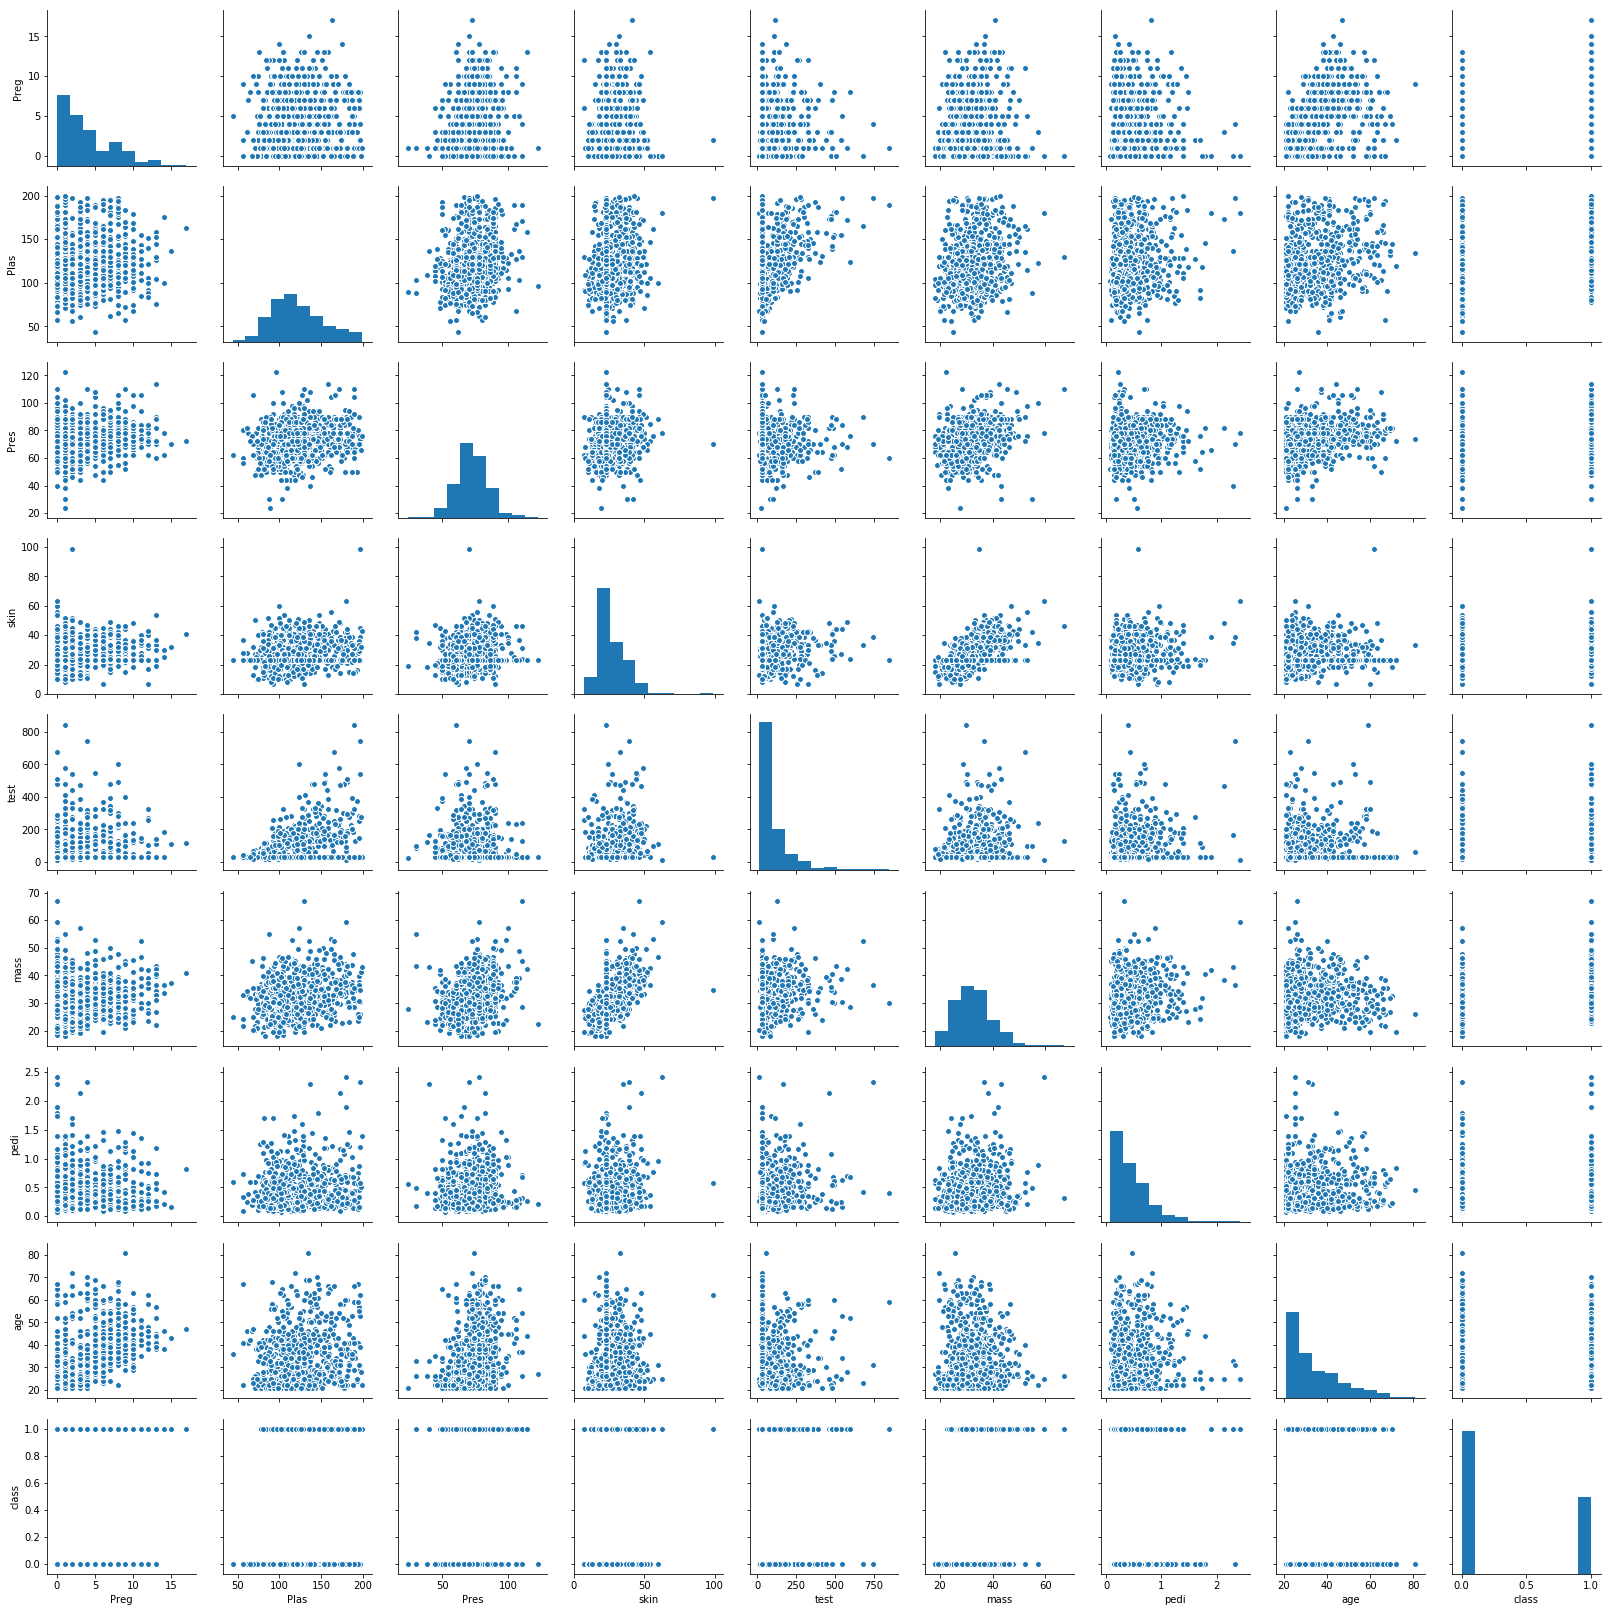

In [134]:
sns.pairplot(pima_df)

Since pregnancy,test,age,pedi histograms are right skewed, they possibly have extreme high outliers.
Based on the scatter plots, skin-mass are better correlated compared to others.

Using the plot - infer the relationship between different variables

In [135]:
print(pearsonr(pima_df['mass'], pima_df['skin'])[0])
print(pearsonr(pima_df['mass'], pima_df['age'])[0])
print(pearsonr(pima_df['pedi'], pima_df['age'])[0])

0.5469513789801432
0.02574447097511567
0.03356131243480553


# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [136]:
array = pima_df.values
X = array[:,0:len(pima_df.columns)-1] # select all rows and first 8 columns which are the attributes
Y = array[:,len(pima_df.columns)-1]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [137]:
dt_model = DecisionTreeClassifier(criterion = 'entropy')
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [138]:
dt_model.score(X_test , y_test)

0.7532467532467533

In [139]:
y_predict = dt_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[117  30]
 [ 27  57]]


# Q10 Print the accuracy of the model & print the confusion matrix 

In [140]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth= 4)
dt_model.fit(X_train, y_train)
y_predict = dt_model.predict(X_test)
print('Score: {}'.format(dt_model.score(X_test , y_test)))
print('Confusion matrix:\n')
print(metrics.confusion_matrix(y_test, y_predict))

Score: 0.7316017316017316
Confusion matrix:

[[106  41]
 [ 21  63]]


Print the feature importance of the decision model - Optional

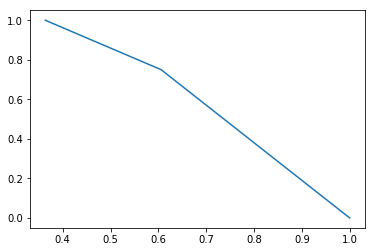

In [141]:
precision,recall,threshold = precision_recall_curve(y_test,y_predict)
plt.plot(precision,recall,label='PRC')